<a href="https://colab.research.google.com/github/TMhdSofyan/Convergence_Analysis/blob/main/Convergence_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Data/Convergence_Data.csv')
df.head()

,ID,Cum_Oil,Cum_Gas
0,0,1641502.0,317000000.0
1,1,1658139.5,326000000.0
2,2,1638181.8,315000000.0
3,3,1637746.9,314000000.0
4,4,1642039.0,333000000.0


In [4]:
# Now, let's proceed with step 4 for calculating the moving average of the 'mean'.
def calculate_cumulative_mean(df, value_column):
    # Calculate the cumulative mean for each ID incrementally
    df['Cumulative_Mean'] = df[value_column].expanding().mean()
    return df

# Apply the function to our dataframe
df_with_means = calculate_cumulative_mean(df, 'Cum_Oil')
df_with_means.head()  # Display the first few rows to verify

,ID,Cum_Oil,Cum_Gas,Cumulative_Mean
0,0,1641502.0,317000000.0,1641502.00
1,1,1658139.5,326000000.0,1649820.75
2,2,1638181.8,315000000.0,1645941.10
3,3,1637746.9,314000000.0,1643892.55
4,4,1642039.0,333000000.0,1643521.84


In [9]:
import matplotlib.pyplot as plt

# Define the window size for the moving average
window_size = 10

# Store each moving average series in a list
moving_averages_list = []


In [10]:
# Assuming 'df' is your DataFrame with the "Cum_Oil" column
# Perform 500 shuffles and calculate moving averages
for _ in range(500):
    # Shuffle the 'Cum_Oil' column values
    shuffled_values = df['Cum_Oil'].sample(frac=1).reset_index(drop=True)

    # Calculate the cumulative mean for the shuffled values
    cumulative_mean = shuffled_values.expanding().mean()

    # Calculate the moving average with the window size
    moving_average = cumulative_mean.rolling(window=window_size).mean()

    # Append the moving average series to our list
    moving_averages_list.append(moving_average)

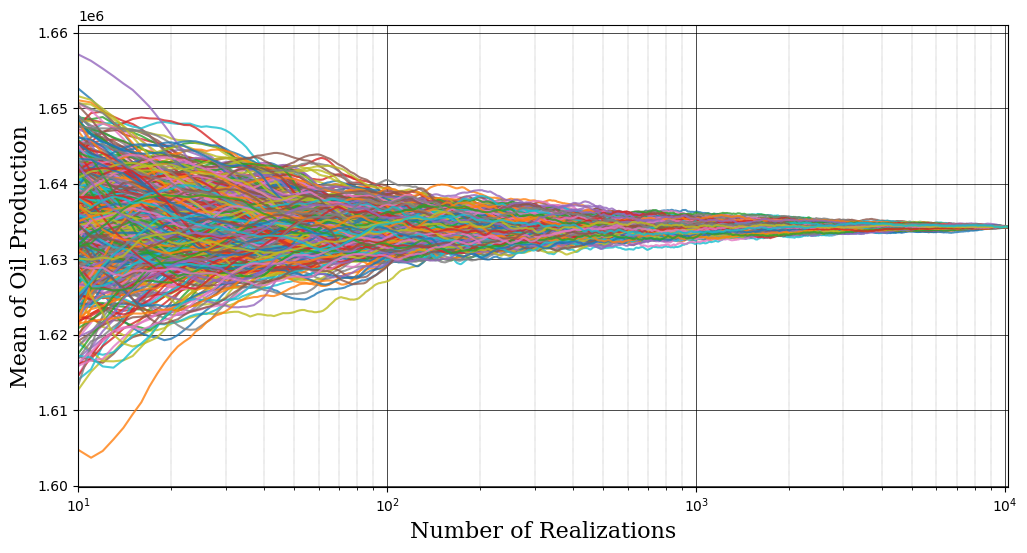

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Now plot all the moving average curves
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each moving average curve
for moving_average in moving_averages_list:
    plt.plot(moving_average, alpha=0.8)  # Set a low alpha to see individual lines

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Set the limits of the x-axis
plt.xlim((10**1, df['ID'].max()))

plt.xlabel('Number of Realizations', fontsize=16, fontname='serif')
plt.ylabel('Mean of Oil Production', fontsize=16, fontname='serif')

# Adding grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')


# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Convergence_Mean.png', dpi=600)
plt.show()

__________________

#**MEDIAN CONVERGENCE**

In [18]:
# Function to calculate medians for each number of realizations
def calculate_median_for_all(values):
    medians = []
    for i in range(1, len(values) + 1):
        subset = values[:i]  # Include up to the current index
        medians.append(np.median(subset))  # Use numpy's median for efficiency
    return np.array(medians)  # Return as a numpy array for better performance

# Store each median series in a list
medians_list = []

# Perform 500 shuffles and calculate medians for each shuffle
for _ in range(500):
    shuffled_values = df['Cum_Oil'].sample(frac=1).reset_index(drop=True)
    median_values = calculate_median_for_all(shuffled_values)

    # Optional: Calculate a moving average of the median if needed for smoothing
    moving_median = pd.Series(median_values).rolling(window=10, min_periods=1).mean()
    medians_list.append(moving_median)

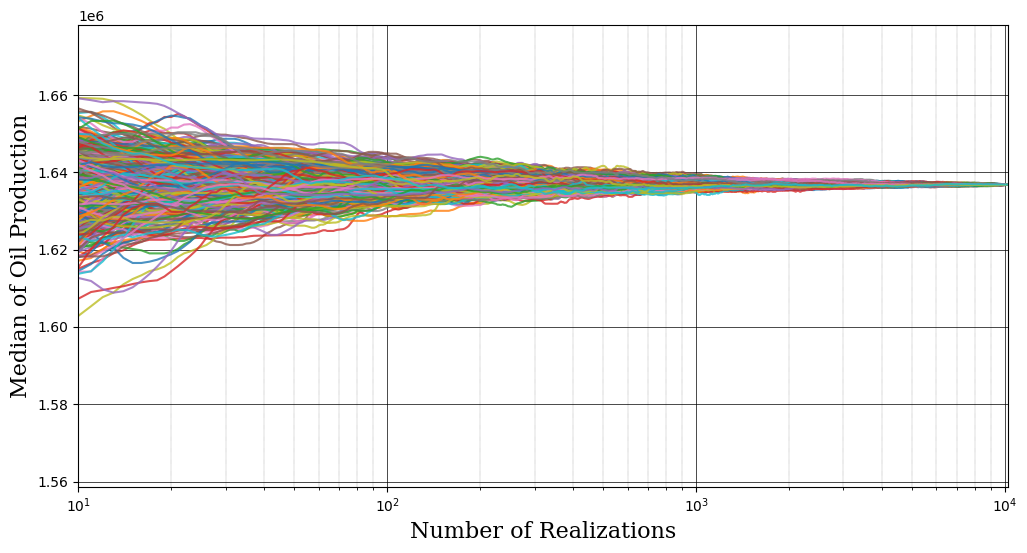

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Now plot all the moving average curves
fig, ax = plt.subplots(figsize=(12, 6))
for median_values in medians_list:
    plt.plot(median_values, alpha=0.8)  # Using a low alpha to see individual lines

plt.xscale('log')
plt.xlim((10**1, df['ID'].max()))

plt.xlabel('Number of Realizations', fontsize=16, fontname='serif')
plt.ylabel('Median of Oil Production', fontsize=16, fontname='serif')

# Adding grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

fig.savefig('/content/drive/MyDrive/THESIS/Picture/Convergence_Median.png', dpi=600)
plt.show()

___________

#**P10 Convergence Plot**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Function to calculate the expanding P10
def calculate_expanding_p10(values):
    p10s = []
    for i in range(1, len(values) + 1):
        subset = values[:i]
        p10 = np.percentile(subset, 10)
        p10s.append(p10)
    return np.array(p10s)

# Store each P10 series in a list
p10s_list = []

# Perform 500 shuffles and calculate P10s
for _ in range(500):
    shuffled_values = df['Cum_Oil'].sample(frac=1).reset_index(drop=True)
    p10_values = calculate_expanding_p10(shuffled_values)

    # Optional: Calculate a moving average of the P10 if needed for smoothing
    moving_p10 = pd.Series(p10_values).rolling(window=10, min_periods=1).mean()
    p10s_list.append(moving_p10)

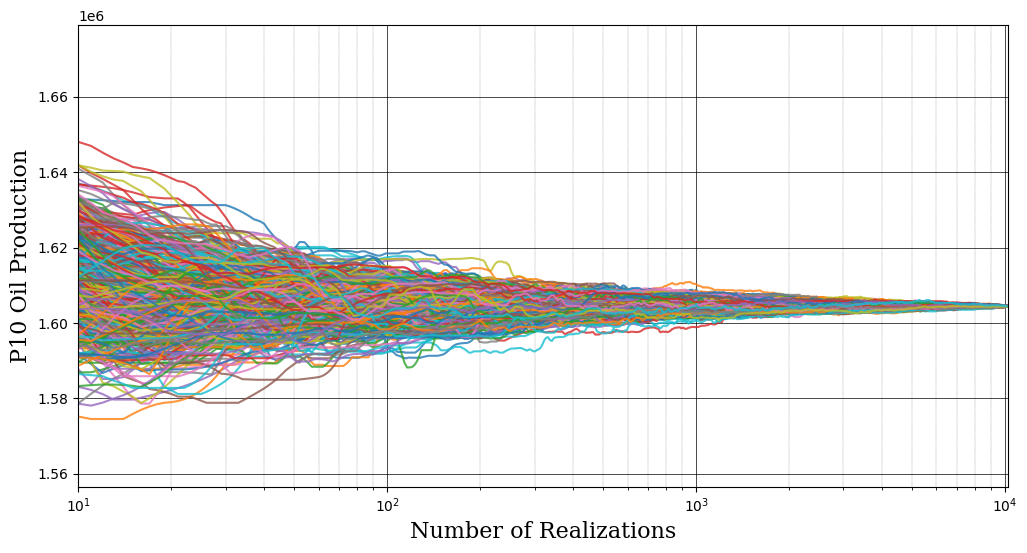

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Now plot all the moving P10 curves
fig, ax = plt.subplots(figsize=(12, 6))
for p10_values in p10s_list:
    plt.plot(p10_values, alpha=0.8)

plt.xscale('log')
plt.xlim((10**1, df['ID'].max()))

plt.xlabel('Number of Realizations', fontsize=16, fontname='serif')
plt.ylabel('P10 Oil Production', fontsize=16, fontname='serif')


# Adding grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

fig.savefig('/content/drive/MyDrive/THESIS/Picture/Convergence_P10.png', dpi=600)
plt.show()

__________

#**P90 Convergence Plot**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Function to calculate the expanding P90
def calculate_expanding_p90(values):
    p90s = []
    for i in range(1, len(values) + 1):
        subset = values[:i]
        p90 = np.percentile(subset, 90)
        p90s.append(p90)
    return np.array(p90s)

# Store each P90 series in a list
p90s_list = []

# Perform 500 shuffles and calculate P90s
for _ in range(500):
    shuffled_values = df['Cum_Oil'].sample(frac=1).reset_index(drop=True)
    p90_values = calculate_expanding_p90(shuffled_values)

    # Optional: Calculate a moving average of the P90 if needed for smoothing
    moving_p90 = pd.Series(p90_values).rolling(window=10, min_periods=1).mean()
    p90s_list.append(moving_p90)

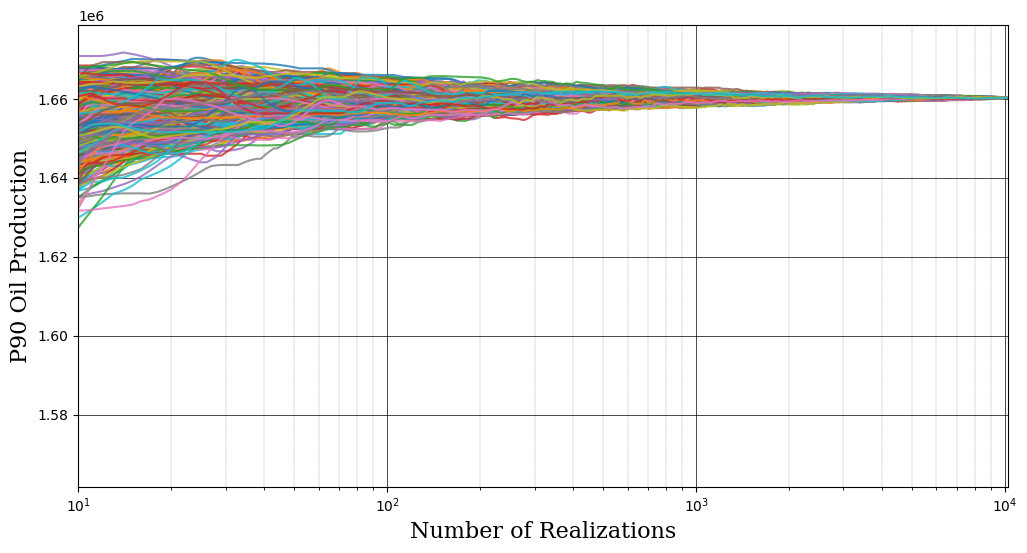

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Now plot all the moving P10 curves
fig, ax = plt.subplots(figsize=(12, 6))
for p90_values in p90s_list:
    plt.plot(p90_values, alpha=0.8)

plt.xscale('log')
plt.xlim((10**1, df['ID'].max()))

plt.xlabel('Number of Realizations', fontsize=16, fontname='serif')
plt.ylabel('P90 Oil Production', fontsize=16, fontname='serif')


# Adding grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

fig.savefig('/content/drive/MyDrive/THESIS/Picture/Convergence_P90.png', dpi=600)
plt.show()